In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import joblib

In [3]:
df = pd.read_csv('synthetic_ott_churn.csv')
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.02,Action,18,2,64.09,34,PayPal,Yes,0
1,2,33,Male,Basic,12.31,Romance,8,1,5.00,31,Card,Yes,1
2,3,41,Male,Standard,23.01,Documentary,4,3,41.47,17,Card,Yes,1
3,4,50,Male,Basic,16.16,Drama,52,2,18.49,52,Card,Yes,1
4,5,32,Female,Basic,27.58,Comedy,54,1,39.08,13,Card,Yes,1


In [5]:
df.shape

(10900, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10900 entries, 0 to 10899
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10900 non-null  int64  
 1   age                     10900 non-null  int64  
 2   gender                  10900 non-null  object 
 3   subscription_plan       10900 non-null  object 
 4   monthly_watch_hours     10900 non-null  float64
 5   preferred_genre         10900 non-null  object 
 6   days_since_last_login   10900 non-null  int64  
 7   num_devices             10900 non-null  int64  
 8   avg_session_duration    10900 non-null  float64
 9   customer_tenure_months  10900 non-null  int64  
 10  payment_method          10900 non-null  object 
 11  auto_renewal_enabled    10900 non-null  object 
 12  is_churned              10900 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [7]:
df.describe()

,customer_id,age,monthly_watch_hours,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,is_churned
count,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000,10900.000000
mean,5450.500000,34.657248,24.257111,29.369725,2.348440,35.285640,29.896422,0.633394
std,3146.703301,9.565731,11.276249,17.399179,1.114865,20.812023,16.935151,0.481900
min,1.000000,18.000000,2.000000,0.000000,1.000000,5.000000,1.000000,0.000000
25%,2725.750000,28.000000,16.467500,14.000000,1.000000,20.047500,15.000000,0.000000
50%,5450.500000,34.000000,23.440000,29.000000,2.000000,31.825000,30.000000,1.000000
75%,8175.250000,41.000000,31.130000,44.000000,3.000000,46.805000,45.000000,1.000000
max,10900.000000,70.000000,80.000000,59.000000,5.000000,120.000000,59.000000,1.000000


In [8]:
df.describe(include='all')

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
count,10900.000000,10900.000000,10900,10900,10900.000000,10900,10900.000000,10900.000000,10900.000000,10900.000000,10900,10900,10900.000000
unique,NaN,NaN,3,3,NaN,6,NaN,NaN,NaN,NaN,3,2,NaN
top,NaN,NaN,Male,Basic,NaN,Horror,NaN,NaN,NaN,NaN,Card,Yes,NaN
freq,NaN,NaN,6189,6036,NaN,1864,NaN,NaN,NaN,NaN,6539,8622,NaN
mean,5450.500000,34.657248,NaN,NaN,24.257111,NaN,29.369725,2.348440,35.285640,29.896422,NaN,NaN,0.633394
std,3146.703301,9.565731,NaN,NaN,11.276249,NaN,17.399179,1.114865,20.812023,16.935151,NaN,NaN,0.481900
min,1.000000,18.000000,NaN,NaN,2.000000,NaN,0.000000,1.000000,5.000000,1.000000,NaN,NaN,0.000000
25%,2725.750000,28.000000,NaN,NaN,16.467500,NaN,14.000000,1.000000,20.047500,15.000000,NaN,NaN,0.000000
50%,5450.500000,34.000000,NaN,NaN,23.440000,NaN,29.000000,2.000000,31.825000,30.000000,NaN,NaN,1.000000
75%,8175.250000,41.000000,NaN,NaN,31.130000,NaN,44.000000,3.000000,46.805000,45.000000,NaN,NaN,1.000000


In [9]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_plan         0
monthly_watch_hours       0
preferred_genre           0
days_since_last_login     0
num_devices               0
avg_session_duration      0
customer_tenure_months    0
payment_method            0
auto_renewal_enabled      0
is_churned                0
dtype: int64

In [10]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()} unique values')

customer_id : 10900 unique values
age : 52 unique values
gender : 3 unique values
subscription_plan : 3 unique values
monthly_watch_hours : 3984 unique values
preferred_genre : 6 unique values
days_since_last_login : 60 unique values
num_devices : 5 unique values
avg_session_duration : 5465 unique values
customer_tenure_months : 59 unique values
payment_method : 3 unique values
auto_renewal_enabled : 2 unique values
is_churned : 2 unique values


In [11]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

In [12]:
print('\nNumeric Columns : ',num_cols)
print('\nCategorical Columns : ',cat_cols)


Numeric Columns :  ['customer_id', 'age', 'monthly_watch_hours', 'days_since_last_login', 'num_devices', 'avg_session_duration', 'customer_tenure_months', 'is_churned']

Categorical Columns :  ['gender', 'subscription_plan', 'preferred_genre', 'payment_method', 'auto_renewal_enabled']


In [13]:
df.head(2)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.02,Action,18,2,64.09,34,PayPal,Yes,0
1,2,33,Male,Basic,12.31,Romance,8,1,5.00,31,Card,Yes,1


In [14]:
ch = df['is_churned'].mean() * 100
print(f'Overall Churn Rate is :{ch:.2f}%')

Overall Churn Rate is :63.34%


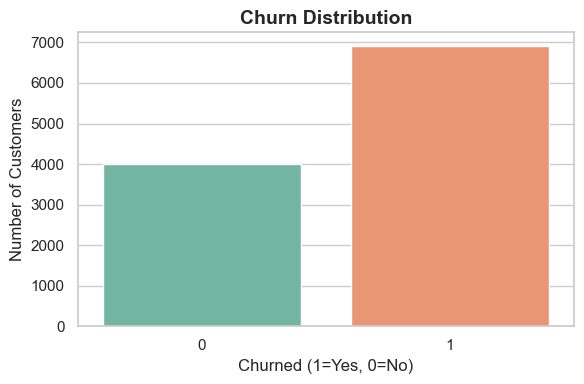

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,4))
ax = sns.countplot(x='is_churned', data=df, palette='Set2')
plt.title('Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churned (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()

In [16]:
df.head(2)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.02,Action,18,2,64.09,34,PayPal,Yes,0
1,2,33,Male,Basic,12.31,Romance,8,1,5.00,31,Card,Yes,1


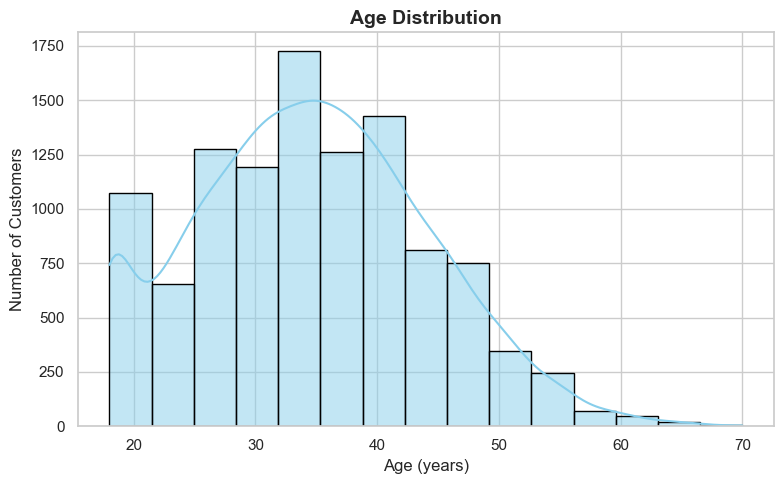

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'],bins=15, kde=True,color='skyblue',edgecolor='black')

plt.title('Age Distribution',fontsize=14, fontweight='bold')
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.tight_layout()
plt.show()

In [18]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.02,Action,18,2,64.09,34,PayPal,Yes,0
1,2,33,Male,Basic,12.31,Romance,8,1,5.00,31,Card,Yes,1
2,3,41,Male,Standard,23.01,Documentary,4,3,41.47,17,Card,Yes,1
3,4,50,Male,Basic,16.16,Drama,52,2,18.49,52,Card,Yes,1


In [19]:
gender_churn = (
    df.groupby(['gender','is_churned']).size().reset_index(name='count')
)
gender_churn

,gender,is_churned,count
0,Female,0,1555
1,Female,1,2673
2,Male,0,2241
3,Male,1,3948
4,Other,0,200
5,Other,1,283


In [20]:
gender_total = gender_churn.groupby('gender')['count'].transform('sum')
gender_total

0    4228
1    4228
2    6189
3    6189
4     483
5     483
Name: count, dtype: int64

In [21]:
gender_churn['percent'] = (gender_churn['count']/gender_total * 100).round(1)
gender_churn['percent']

0    36.8
1    63.2
2    36.2
3    63.8
4    41.4
5    58.6
Name: percent, dtype: float64

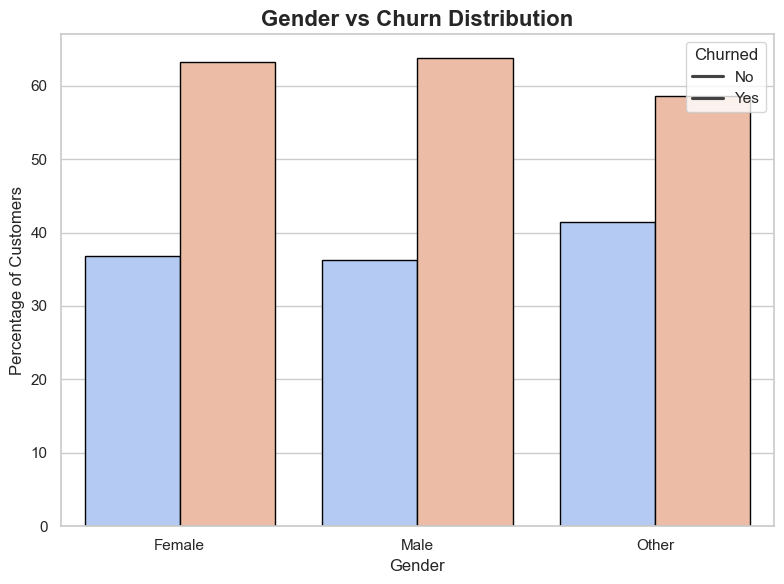

In [22]:
plt.figure(figsize=(8,6))
ax =  sns.barplot( data = gender_churn, x='gender', y='percent', hue='is_churned', palette='coolwarm',edgecolor='black')
plt.title('Gender vs Churn Distribution', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.legend(title='Churned',labels=['No','Yes'],loc='upper right',frameon=True)
plt.tight_layout()
plt.show()

# Subscription Plan Distribution

In [23]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.02,Action,18,2,64.09,34,PayPal,Yes,0
1,2,33,Male,Basic,12.31,Romance,8,1,5.00,31,Card,Yes,1
2,3,41,Male,Standard,23.01,Documentary,4,3,41.47,17,Card,Yes,1
3,4,50,Male,Basic,16.16,Drama,52,2,18.49,52,Card,Yes,1


In [24]:
plan_churn = df.groupby(['subscription_plan','is_churned']).size().reset_index(name='count')
plan_churn

,subscription_plan,is_churned,count
0,Basic,0,1935
1,Basic,1,4101
2,Premium,0,698
3,Premium,1,854
4,Standard,0,1363
5,Standard,1,1949


In [25]:
plan_total = plan_churn.groupby('subscription_plan')['count'].transform('sum')
plan_churn['percent'] = (plan_churn['count'] / plan_total * 100).round(1) 
plan_churn

,subscription_plan,is_churned,count,percent
0,Basic,0,1935,32.1
1,Basic,1,4101,67.9
2,Premium,0,698,45.0
3,Premium,1,854,55.0
4,Standard,0,1363,41.2
5,Standard,1,1949,58.8


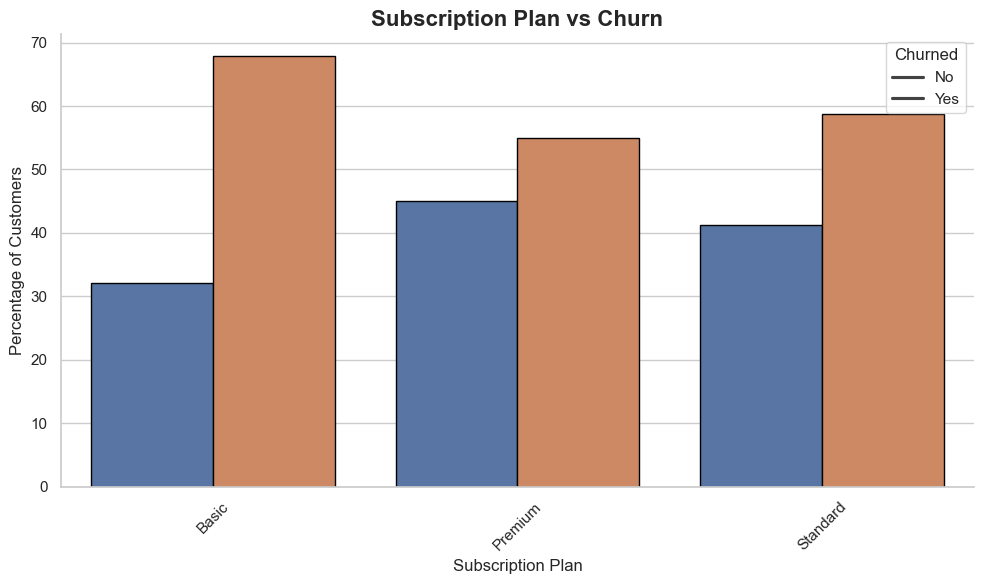

In [26]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=plan_churn, x='subscription_plan', y='percent', hue='is_churned', edgecolor='black')
plt.title("Subscription Plan vs Churn", fontsize=16, weight='bold')
plt.xlabel("Subscription Plan", fontsize=12)
plt.ylabel("Percentage of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Churned', labels=['No', 'Yes'])
sns.despine()
plt.tight_layout()
plt.show()

# Watch Hours Distribution

In [27]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.02,Action,18,2,64.09,34,PayPal,Yes,0
1,2,33,Male,Basic,12.31,Romance,8,1,5.00,31,Card,Yes,1
2,3,41,Male,Standard,23.01,Documentary,4,3,41.47,17,Card,Yes,1
3,4,50,Male,Basic,16.16,Drama,52,2,18.49,52,Card,Yes,1


In [28]:
df['monthly_watch_hours']=df['monthly_watch_hours'].round(1)
df['avg_session_duration']=df['avg_session_duration'].round(1)

In [29]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1


In [30]:
df[['monthly_watch_hours','subscription_plan', 'is_churned']]

,monthly_watch_hours,subscription_plan,is_churned
0,28.0,Basic,0
1,12.3,Basic,1
2,23.0,Standard,1
3,16.2,Basic,1
4,27.6,Basic,1
...,...,...,...
10895,14.8,Basic,1
10896,20.2,Basic,1
10897,2.0,Basic,1
10898,11.9,Basic,1


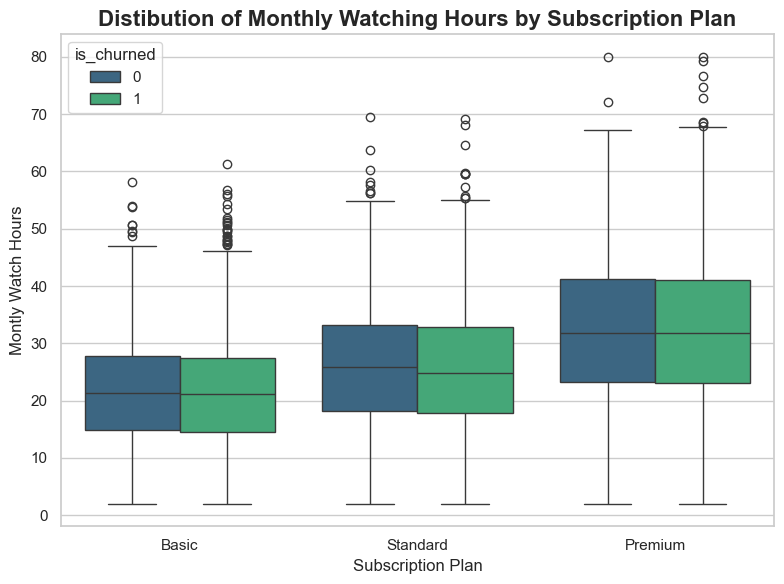

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='subscription_plan', y='monthly_watch_hours', hue='is_churned', palette='viridis')
plt.title('Distibution of Monthly Watching Hours by Subscription Plan', fontsize=16, weight='bold')
plt.xlabel('Subscription Plan',fontsize=12)
plt.ylabel('Montly Watch Hours', fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
avg_hours = df.groupby('subscription_plan')['monthly_watch_hours'].agg(['mean','median','std','count']).reset_index()
avg_hours

,subscription_plan,mean,median,std,count
0,Basic,21.395709,21.2,9.451768,6036
1,Premium,32.202899,31.8,13.365728,1552
2,Standard,25.747615,25.2,11.193009,3312


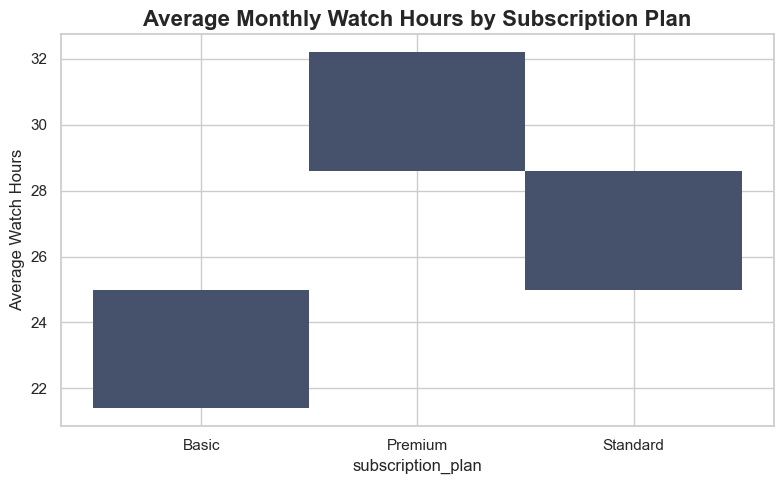

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(data=avg_hours, x='subscription_plan', y='mean')
plt.title("Average Monthly Watch Hours by Subscription Plan", fontsize=16, weight='bold')
plt.ylabel("Average Watch Hours", fontsize=12)
plt.tight_layout()
plt.show()

In [34]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1


# Preferred Genre

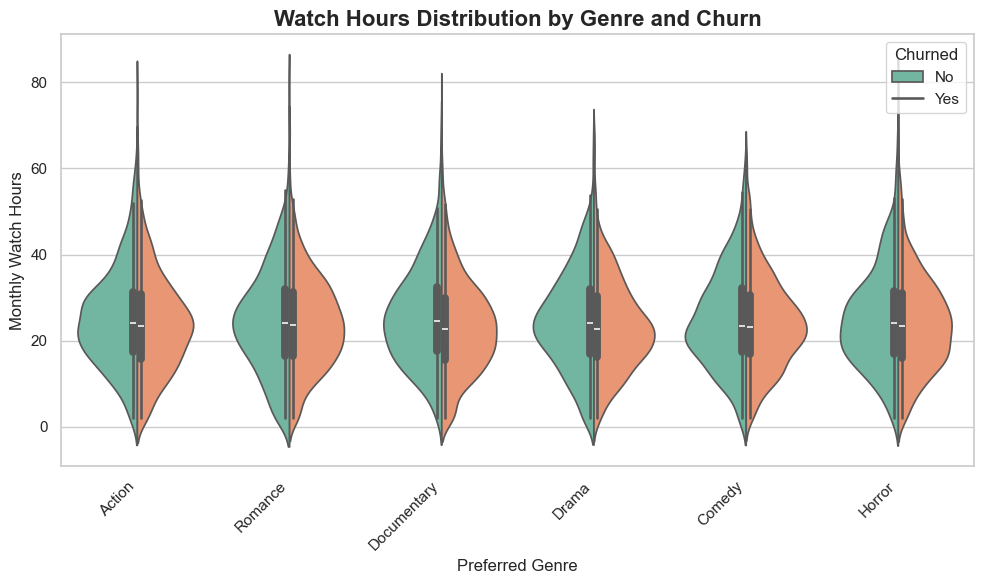

In [35]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='preferred_genre',y='monthly_watch_hours',hue='is_churned',split=True,palette='Set2')
plt.title("Watch Hours Distribution by Genre and Churn", fontsize=16, weight='bold')
plt.xlabel("Preferred Genre")
plt.ylabel("Monthly Watch Hours")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churned', labels=['No','Yes'], loc='upper right')
plt.tight_layout()
plt.show()

# Devices Linked

In [36]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1


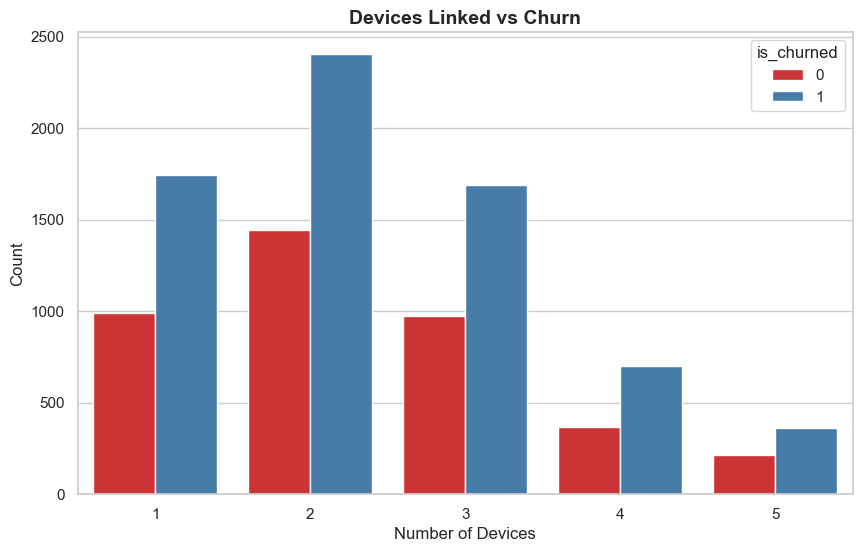

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='num_devices', hue='is_churned',data=df,palette='Set1')
plt.title('Devices Linked vs Churn', fontsize=14, weight='bold')
plt.xlabel('Number of Devices')
plt.ylabel('Count')
plt.show()

# Days Since Last Login

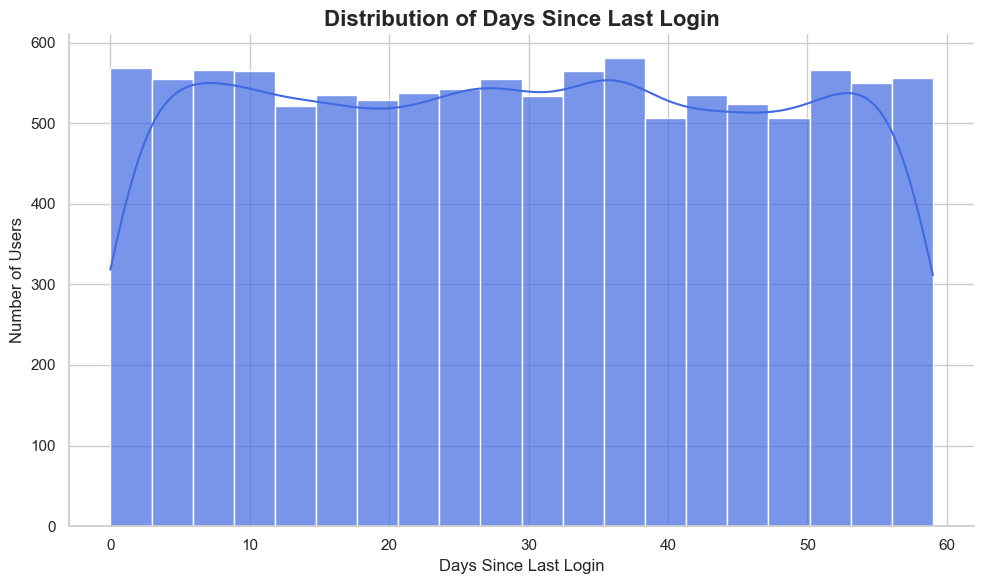

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='days_since_last_login', bins=20, kde=True,color='royalblue',alpha=0.7)

plt.title("Distribution of Days Since Last Login", fontsize=16, weight='bold')
plt.xlabel("Days Since Last Login", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
             
sns.despine()
plt.tight_layout()
plt.show()

In [39]:
df['days_since_last_login'].value_counts().head(4)

days_since_last_login
35    217
4     208
0     200
26    200
Name: count, dtype: int64

In [40]:
def categorize_login_days(x):
    if x<=10:
        return 'Active'
    elif x<=30:
        return 'Moderately Active'
    else:
        return 'Inactive'

df['login_segment'] = df['days_since_last_login'].apply(categorize_login_days)
df.head(3)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned,login_segment
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0,Moderately Active
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1,Active
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1,Active


In [41]:
df['login_segment'].value_counts()

login_segment
Inactive             5237
Moderately Active    3598
Active               2065
Name: count, dtype: int64

In [42]:
df['login_segment'].value_counts(normalize=True)

login_segment
Inactive             0.480459
Moderately Active    0.330092
Active               0.189450
Name: proportion, dtype: float64

In [43]:
df['login_segment'].value_counts(normalize=True).mul(100).round(1)

login_segment
Inactive             48.0
Moderately Active    33.0
Active               18.9
Name: proportion, dtype: float64

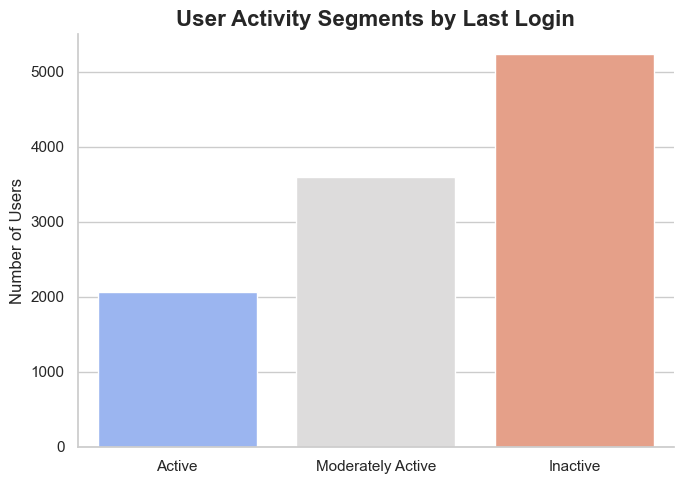

In [44]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='login_segment',palette='coolwarm',order=['Active','Moderately Active','Inactive'])
plt.title("User Activity Segments by Last Login", fontsize=16, weight='bold')
plt.ylabel("Number of Users")
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.show()

# Average Session Duration

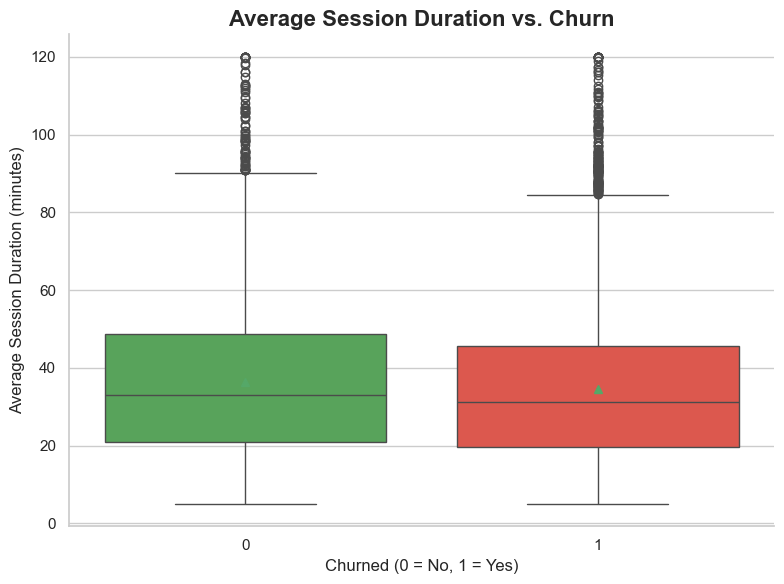

In [45]:
plt.figure(figsize=(8,6))
ax = sns.boxplot( data=df, x='is_churned', y='avg_session_duration', palette=['#4CAF50', '#F44336'], showmeans=True,)
plt.title("Average Session Duration vs. Churn", fontsize=16, weight='bold')
plt.xlabel("Churned (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Average Session Duration (minutes)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [46]:
from scipy import stats

retained = df.loc[df['is_churned']==0, 'avg_session_duration'].dropna()
churned = df.loc[df['is_churned'] == 1, 'avg_session_duration'].dropna()

t_stat,p_val = stats.ttest_ind(retained, churned, equal_var=False)

In [47]:
print("T-test Results:")
print(f"t-statistic = {t_stat:.3f}")
print(f"p-value     = {p_val:.5f}")

# Interpret result
if p_val < 0.05:
    print("\nThe difference in average session duration between churned and retained users is statistically significant (p < 0.05).")
else:
    print("\nNo statistically significant difference detected (p ≥ 0.05).")

T-test Results:
t-statistic = 4.499
p-value     = 0.00001

The difference in average session duration between churned and retained users is statistically significant (p < 0.05).


In [48]:
#No significant difference → session duration alone may not explain churn.

# Tenure Distribution

In [49]:
df.head(3)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned,login_segment
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0,Moderately Active
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1,Active
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1,Active


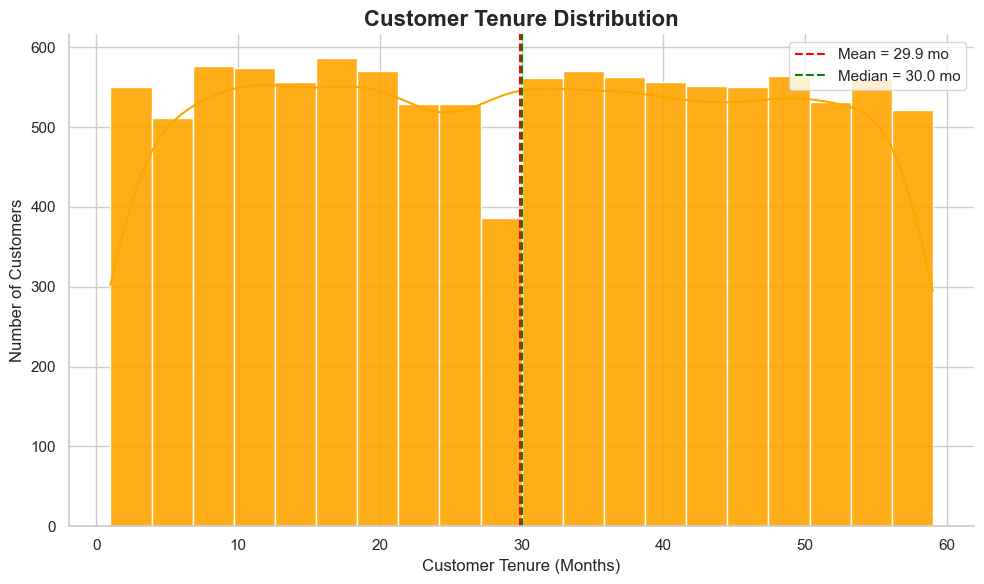

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='customer_tenure_months', bins=20, color='orange',kde=True,alpha=0.9)

mean_tenure = df['customer_tenure_months'].mean()
median_tenure = df['customer_tenure_months'].median()

plt.axvline(mean_tenure, color='red', linestyle='--', label=f'Mean = {mean_tenure:.1f} mo')
plt.axvline(median_tenure, color='green', linestyle='--', label=f'Median = {median_tenure:.1f} mo')

plt.title("Customer Tenure Distribution", fontsize=16, weight='bold')
plt.xlabel("Customer Tenure (Months)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

# Payment Method

In [51]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned,login_segment
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0,Moderately Active
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1,Active
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1,Active
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1,Inactive


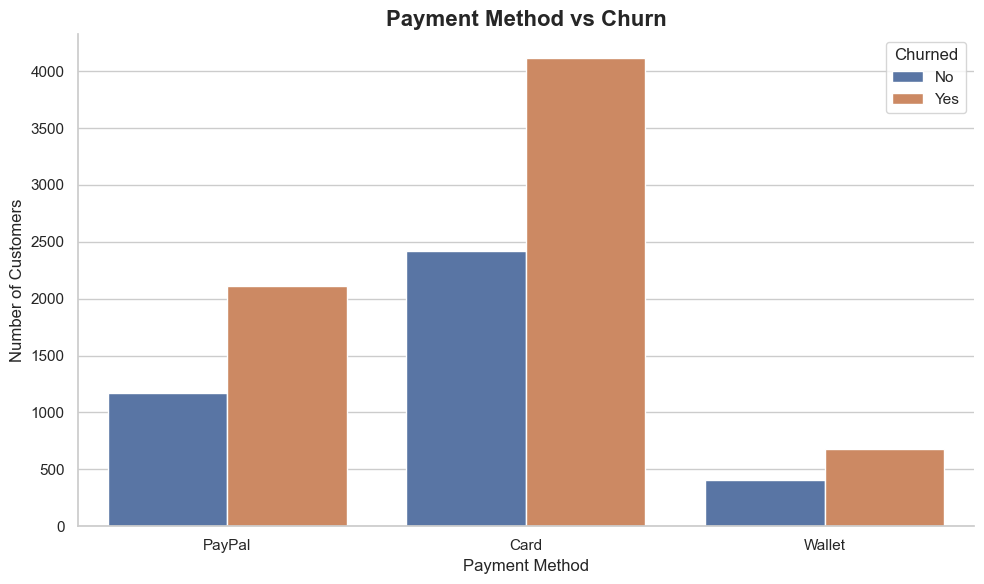

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='payment_method', hue='is_churned', data=df)
plt.title("Payment Method vs Churn", fontsize=16, weight='bold')
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.legend(title="Churned", labels=["No", "Yes"])
sns.despine()
plt.tight_layout()
plt.show()

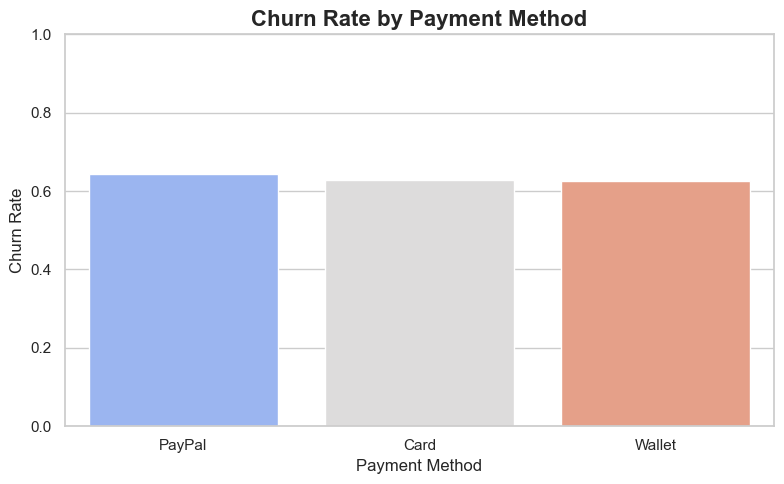

In [53]:
payment_churn_rate = df.groupby('payment_method')['is_churned'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=payment_churn_rate.index, y=payment_churn_rate.values,palette='coolwarm')
plt.title("Churn Rate by Payment Method", fontsize=16, weight='bold')
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

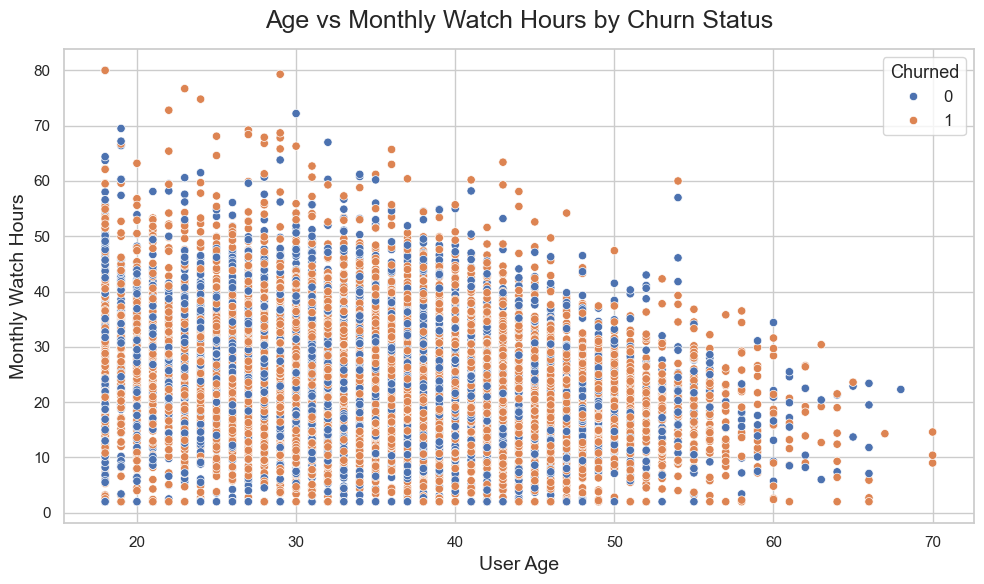

In [54]:
# Scatter plot with trendlines
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot( x='age',  y='monthly_watch_hours' ,hue='is_churned',data=df)

plt.title("Age vs Monthly Watch Hours by Churn Status", fontsize=18, pad=15)
plt.xlabel("User Age", fontsize=14)
plt.ylabel("Monthly Watch Hours", fontsize=14)

plt.legend(title="Churned", title_fontsize=13, fontsize=12, loc="upper right", frameon=True, facecolor="white")

plt.tight_layout()
plt.show()

In [55]:
df.head(4)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned,login_segment
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0,Moderately Active
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1,Active
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1,Active
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1,Inactive


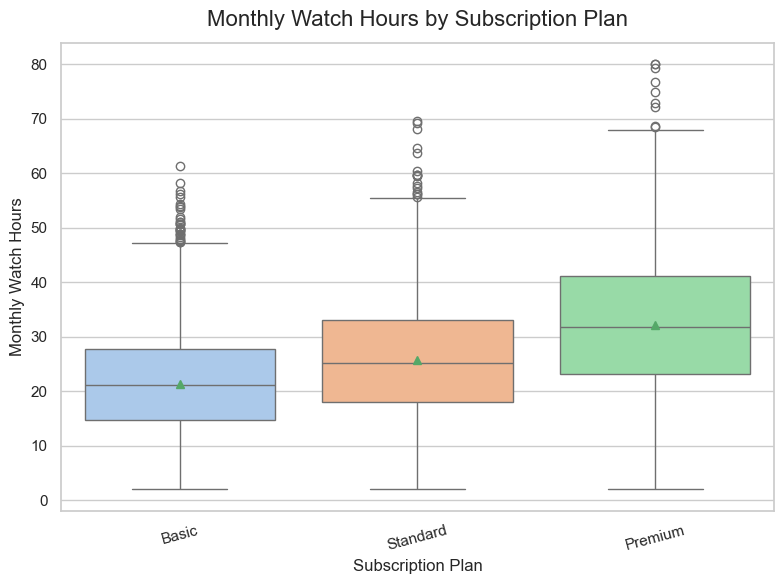

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='subscription_plan',y='monthly_watch_hours',data=df,palette='pastel',showmeans=True)
plt.title("Monthly Watch Hours by Subscription Plan", fontsize=16, pad=12)
plt.xlabel("Subscription Plan", fontsize=12)
plt.ylabel("Monthly Watch Hours", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

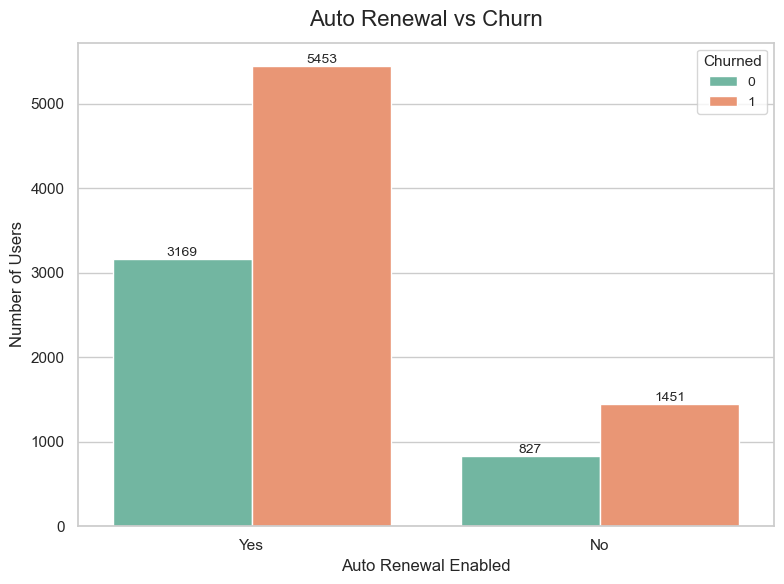

In [57]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='auto_renewal_enabled', hue='is_churned',data=df,palette='Set2')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Auto Renewal vs Churn", fontsize=16, pad=12)
plt.xlabel("Auto Renewal Enabled", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.legend(title='Churned', title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()

In [58]:
df['age_group'] = pd.cut(df['age'], bins=[0,20,30,40,50,60,100], labels=['<20','20-30','30-40','40-50','50-60','60+'])
df['age_group']

0        30-40
1        30-40
2        40-50
3        40-50
4        30-40
         ...  
10895    30-40
10896      <20
10897    20-30
10898    20-30
10899    30-40
Name: age_group, Length: 10900, dtype: category
Categories (6, object): ['<20' < '20-30' < '30-40' < '40-50' < '50-60' < '60+']

In [59]:
age_churn = df.groupby('age_group')['is_churned'].mean().round(2)
age_churn

age_group
<20      0.60
20-30    0.62
30-40    0.62
40-50    0.66
50-60    0.71
60+      0.60
Name: is_churned, dtype: float64

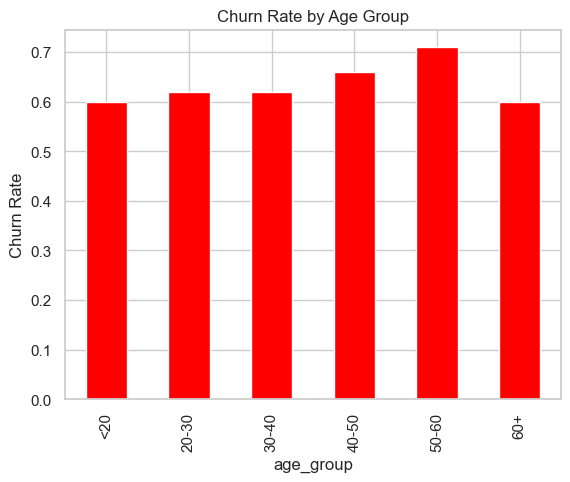

In [60]:
age_churn.plot(kind='bar', color='red', title='Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.show()

In [61]:
df.head(5)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned,login_segment,age_group
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0,Moderately Active,30-40
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1,Active,30-40
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1,Active,40-50
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1,Inactive,40-50
4,5,32,Female,Basic,27.6,Comedy,54,1,39.1,13,Card,Yes,1,Inactive,30-40


In [62]:
df.columns

Index(['customer_id', 'age', 'gender', 'subscription_plan',
       'monthly_watch_hours', 'preferred_genre', 'days_since_last_login',
       'num_devices', 'avg_session_duration', 'customer_tenure_months',
       'payment_method', 'auto_renewal_enabled', 'is_churned', 'login_segment',
       'age_group'],
      dtype='object')

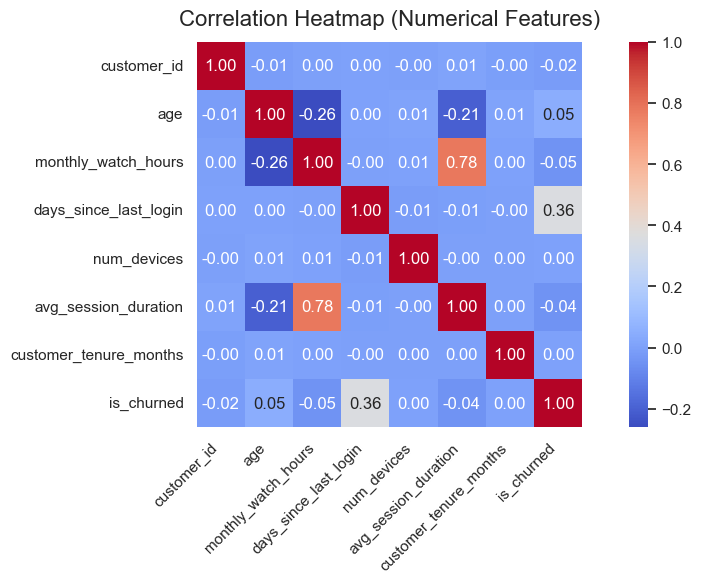

In [63]:
plt.figure(figsize=(10,6))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f', square=True)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

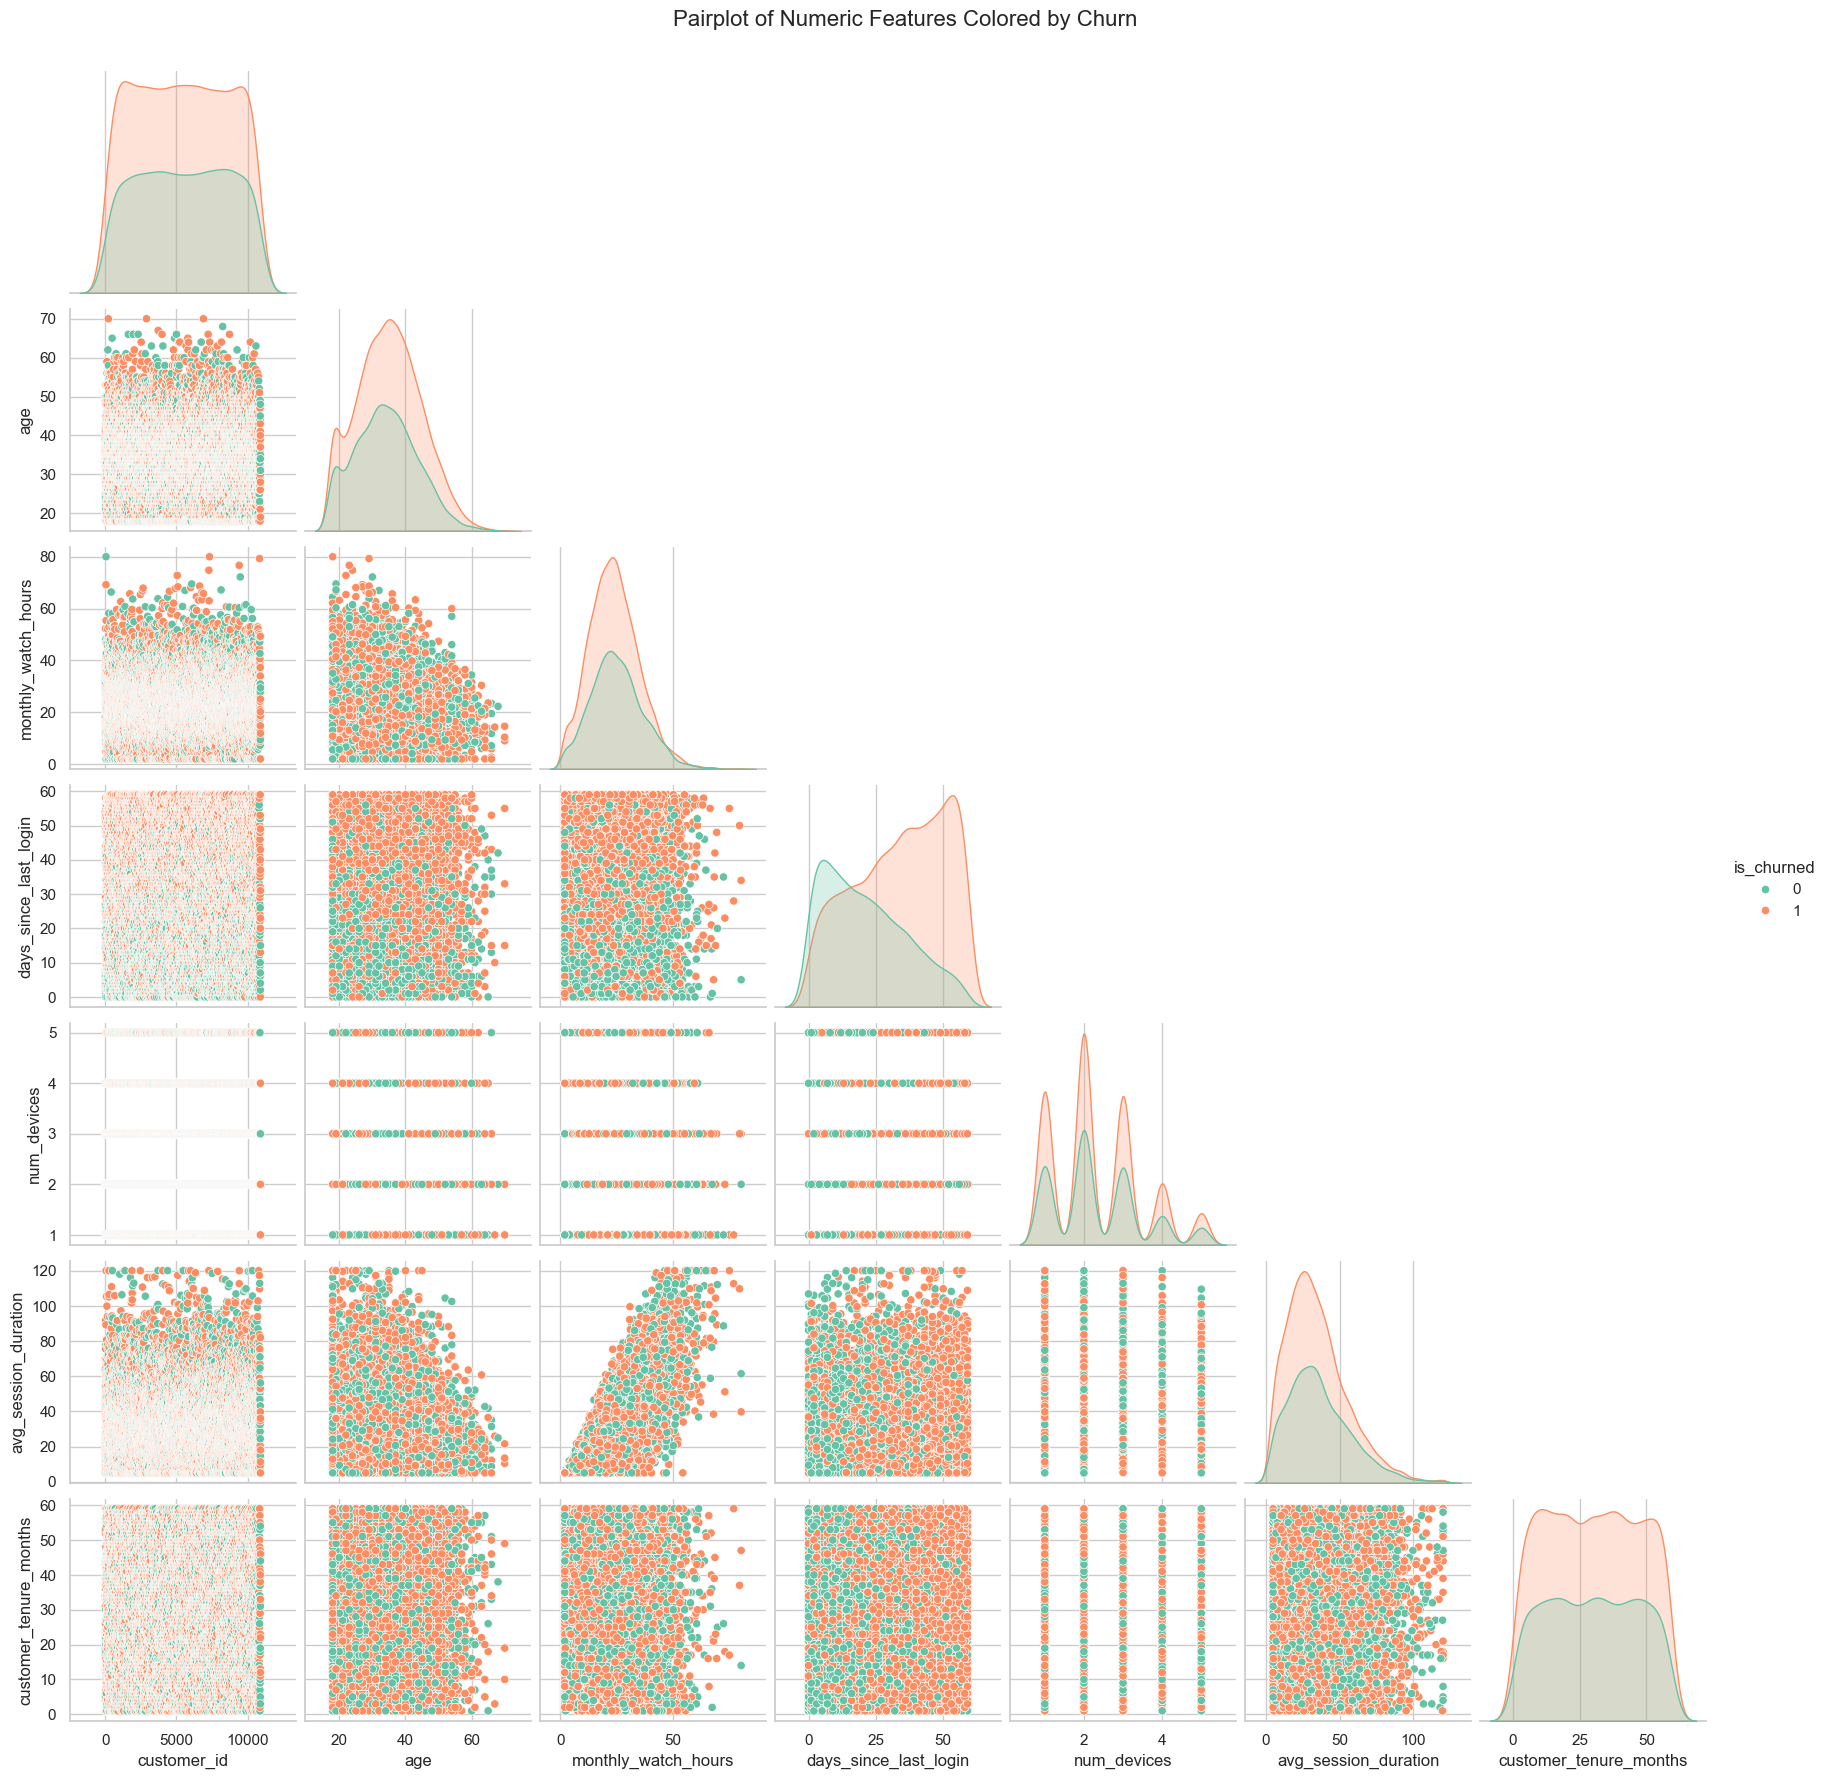

In [64]:
sns.pairplot(df[num_cols], hue='is_churned', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numeric Features Colored by Churn", fontsize=16, y=1.02)
plt.show()

In [65]:
df.head(5)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned,login_segment,age_group
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0,Moderately Active,30-40
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1,Active,30-40
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1,Active,40-50
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1,Inactive,40-50
4,5,32,Female,Basic,27.6,Comedy,54,1,39.1,13,Card,Yes,1,Inactive,30-40


In [66]:
df.columns

Index(['customer_id', 'age', 'gender', 'subscription_plan',
       'monthly_watch_hours', 'preferred_genre', 'days_since_last_login',
       'num_devices', 'avg_session_duration', 'customer_tenure_months',
       'payment_method', 'auto_renewal_enabled', 'is_churned', 'login_segment',
       'age_group'],
      dtype='object')

In [67]:
df.shape

(10900, 15)

In [68]:
#Outlier

In [69]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for col in df.select_dtypes(include=['float64','int64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_clean = df_clean[ (df[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [70]:
df_no_outliers = remove_outliers_iqr(df)
df_no_outliers.head(5)

,customer_id,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned,login_segment,age_group
0,1,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0,Moderately Active,30-40
1,2,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1,Active,30-40
2,3,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1,Active,40-50
3,4,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1,Inactive,40-50
4,5,32,Female,Basic,27.6,Comedy,54,1,39.1,13,Card,Yes,1,Inactive,30-40


In [71]:
df_no_outliers.shape

(10525, 15)

In [72]:
df.shape

(10900, 15)

In [73]:
df = df_no_outliers.copy()

In [74]:
for col in df.columns:
    print(col,':',df[col].nunique())

customer_id : 10525
age : 43
gender : 3
subscription_plan : 3
monthly_watch_hours : 502
preferred_genre : 6
days_since_last_login : 60
num_devices : 5
avg_session_duration : 803
customer_tenure_months : 59
payment_method : 3
auto_renewal_enabled : 2
is_churned : 2
login_segment : 3
age_group : 5


In [75]:
df.drop(['customer_id','login_segment','age_group'],axis=1, inplace=True)

In [76]:
df.head(4)

,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0
1,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1
2,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1
3,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1


In [77]:
corr_with_target = corr['is_churned'].sort_values(ascending=False)
corr_with_target

is_churned                1.000000
days_since_last_login     0.355229
age                       0.048712
num_devices               0.004845
customer_tenure_months    0.000799
customer_id              -0.017413
avg_session_duration     -0.043582
monthly_watch_hours      -0.046655
Name: is_churned, dtype: float64

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

x = df.drop('is_churned',axis=1)
y = df['is_churned']

In [79]:
for col in x.select_dtypes(include=['object','category']).columns:
    x[col] = LabelEncoder().fit_transform(x[col])

In [80]:
model = RandomForestClassifier(random_state=42)
model.fit(x,y)

RandomForestClassifier(random_state=42)

In [81]:
importance = pd.Series(model.feature_importances_, index=x.columns).sort_values()
importance

auto_renewal_enabled      0.018781
subscription_plan         0.024203
gender                    0.029736
payment_method            0.032732
num_devices               0.052405
preferred_genre           0.063335
age                       0.116965
customer_tenure_months    0.130639
avg_session_duration      0.148958
monthly_watch_hours       0.149528
days_since_last_login     0.232718
dtype: float64

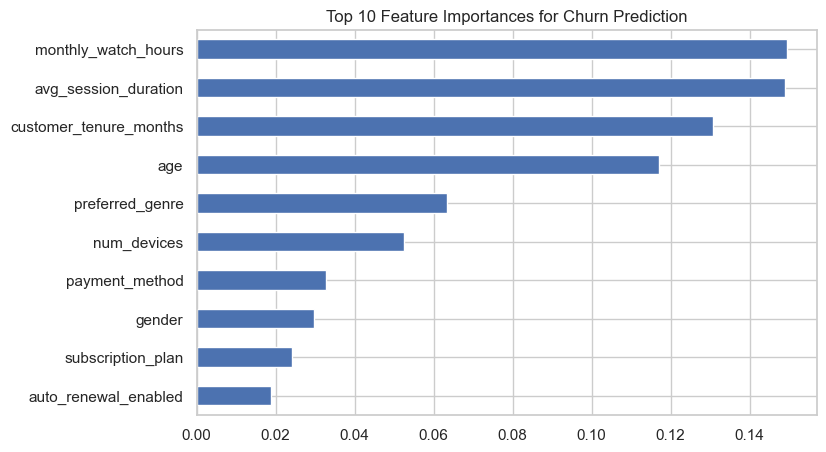

In [82]:
importance.head(10).plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances for Churn Prediction")
plt.show()

In [83]:
df.head()

,age,gender,subscription_plan,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,payment_method,auto_renewal_enabled,is_churned
0,39,Female,Basic,28.0,Action,18,2,64.1,34,PayPal,Yes,0
1,33,Male,Basic,12.3,Romance,8,1,5.0,31,Card,Yes,1
2,41,Male,Standard,23.0,Documentary,4,3,41.5,17,Card,Yes,1
3,50,Male,Basic,16.2,Drama,52,2,18.5,52,Card,Yes,1
4,32,Female,Basic,27.6,Comedy,54,1,39.1,13,Card,Yes,1


In [84]:
df.drop(['subscription_plan','auto_renewal_enabled','payment_method','gender'], axis=1, inplace=True)

In [85]:
le = LabelEncoder()
df['preferred_genre'] = le.fit_transform(df['preferred_genre'])
df.head(5)

,age,monthly_watch_hours,preferred_genre,days_since_last_login,num_devices,avg_session_duration,customer_tenure_months,is_churned
0,39,28.0,0,18,2,64.1,34,0
1,33,12.3,5,8,1,5.0,31,1
2,41,23.0,2,4,3,41.5,17,1
3,50,16.2,3,52,2,18.5,52,1
4,32,27.6,1,54,1,39.1,13,1


In [86]:
x = df.drop('is_churned', axis=1)
y = df['is_churned']

In [87]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [89]:
x_train.shape, x_test.shape

((7367, 7), (3158, 7))

In [90]:
models = {
    'log_reg' : LogisticRegression(),
    'rf' : RandomForestClassifier(random_state=42),
    'gb' : GradientBoostingClassifier(random_state=42),
    'xgb' : XGBClassifier(random_state=42),
    'svm' : SVC(probability=True, random_state=42)
}

In [91]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:,1]

    results[name] = {
        'accuracy' : accuracy_score(y_test,y_pred),
        'precision':precision_score(y_test,y_pred),
        'recall': recall_score(y_test,y_pred),
        'f1-score': f1_score(y_test,y_pred),
        'roc-auc':roc_auc_score(y_test,y_proba),
    }

In [92]:
result_df = pd.DataFrame(results).T.sort_values(by='roc-auc', ascending=False)
result_df

,accuracy,precision,recall,f1-score,roc-auc
log_reg,0.678594,0.715030,0.820948,0.764337,0.716889
gb,0.664345,0.706062,0.807481,0.753374,0.700223
svm,0.662128,0.694444,0.835411,0.758433,0.679932
rf,0.653262,0.699912,0.794514,0.744219,0.678664
xgb,0.634262,0.688053,0.775561,0.729191,0.659027


In [93]:
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 3, 10),              
    'solver': ['saga'],
    'max_iter': [500, 1000, 2000]
}

In [94]:
rs_lr = RandomizedSearchCV(
    LogisticRegression(random_state=42), param_distributions=param_grid_lr, n_iter=20, cv=5,n_jobs=1, random_state=42
)

In [95]:
rs_lr.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'max_iter': [500, 1000, 2000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['saga']},
                   random_state=42)

In [96]:
rs_lr.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 1000, 'C': 2.154434690031882}

In [97]:
rs_lr.best_score_

0.680328039491489

In [98]:
cv_scores = cross_val_score(rs_lr, x, y, cv=10)
cv_scores.mean()

0.6792424505035406

In [99]:
joblib.dump(rs_lr, 'churn_model.pkl')

['churn_model.pkl']

In [100]:
x_train[0]

array([ 0.46179029, -1.19134175, -0.30337513,  1.64942271, -0.313385  ,
       -0.91031817,  1.12984582])

In [101]:
y_train[0]

0